In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import expit
import statistics

In [2]:
data = pd.read_csv('letter-recognition.csv',header=None)
data.head()

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0  T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1  I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2  D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3  N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4  G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10

In [3]:
attributes = pd.read_csv('Attributes.csv',header=None)
attributes.head()

0
0             letter_capital_letter
1  x-box_horizontal_position_of_box
2    y-box_vertical_position_of_box
3                width_width_of_box
4                high_height_of_box

In [5]:
attributes_names = []
for i in range(0,len(attributes[0])):
    attributes_names.append(attributes[0][i])

data.columns = attributes_names
#data.head()

In [10]:
import seaborn as sns

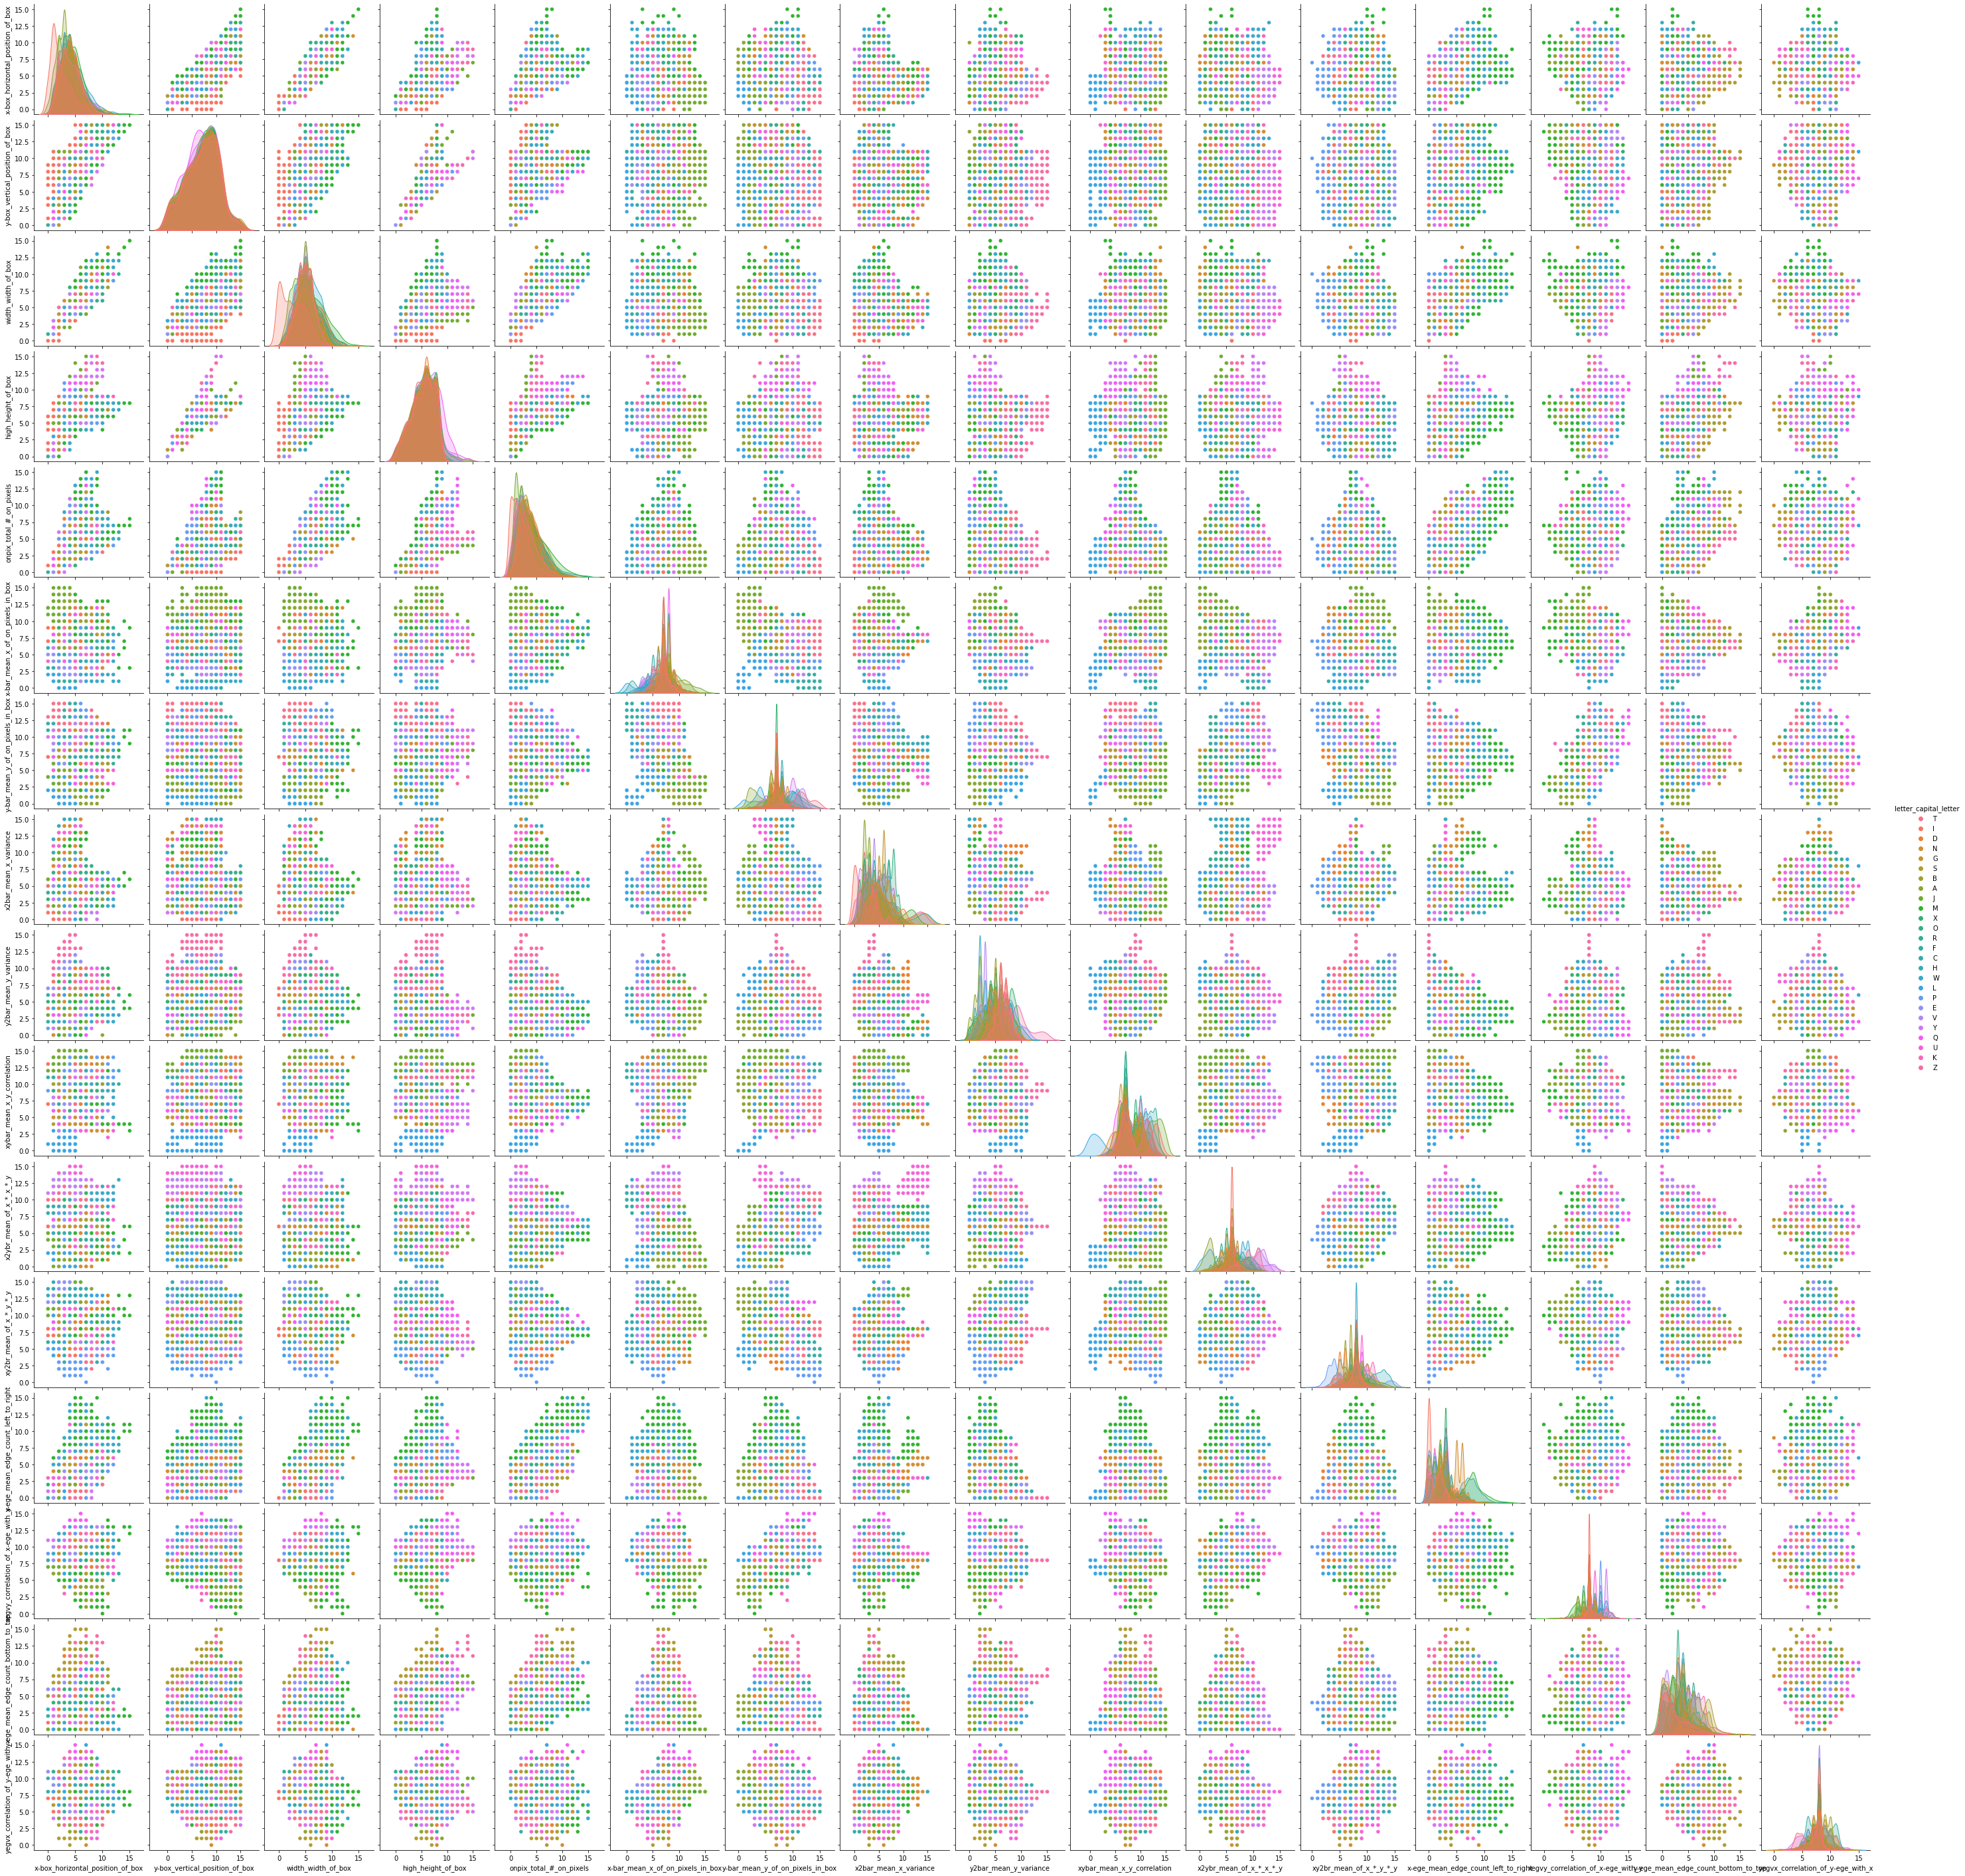

In [6]:
sns.pairplot(data,hue="letter_capital_letter")

In [6]:
X = data.iloc[:,1:]
X = X.values

In [8]:
Y = data.iloc[:,0]
Y.head()

0    T
1    I
2    D
3    N
4    G
Name: letter_capital_letter, dtype: object

In [9]:
temp = []
for i in range(len(Y)):
    val = Y[i]
    val = ord(val) - 65
    temp.append(val)
Y = np.array(temp)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.85)

In [11]:
print("Training Size :- ",len(X_train),"Test Size :- ",len(X_test))
X_train = X_train.T
X_test = X_test.T

Training Size :-  17000 Test Size :-  3000


In [12]:
X_train.shape

(16, 17000)

In [13]:
def Tanh(x):
    return np.tanh(x)

def ReLU(x):
    return np.maximum(x,0)

def derivative_ReLU(x):
    return x > 0

def derivative_Tanh(x):
    return (1 - Tanh(x)*Tanh(x))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 25 + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def softmax(Z):
    A = expit(Z) / sum(expit(Z))
    return A

def CrossEntropyLoss(A,one_hot_Y):
    return -np.mean(one_hot_Y * np.log(A + 1e-8))
    

In [14]:
m = len(data)
n_features = 16
n_classes = 26

hidden_nodes_1 = 20
hidden_nodes_2 = 40
hidden_nodes_3 = 80
hidden_nodes_4 = 40

In [15]:
aplha = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
def AdamDemo(W1,W2,W3,W4,WO,b1,b2,b3,b4,bO,
                        dW1,db1,dW2,db2,dW3,db3,dW4,db4,dWO,dbO,learning_rate,
                                    v_dW1,v_dW2,v_dW3,v_dW4,v_dWO,
                                    v_db1,v_db2,v_db3,v_db4,v_dbO,
                                    s_dW1,s_dW2,s_dW3,s_dW4,s_dWO,
                                    s_db1,s_db2,s_db3,s_db4,s_dbO):
            
        ################# Adding Momentum to Weights ################# 
    v_dW1 = beta1*v_dW1 + (1 - beta1)*dW1
    v_dW2 = beta1*v_dW2 + (1 - beta1)*dW2
    v_dW3 = beta1*v_dW3 + (1 - beta1)*dW3
    v_dW4 = beta1*v_dW4 + (1 - beta1)*dW4
    v_dWO = beta1*v_dWO + (1 - beta1)*dWO

        ################ Adding Momentum to biases ###################
    v_db1 = beta1*v_db1 + (1 - beta1)*db1
    v_db2 = beta1*v_db2 + (1 - beta1)*db2
    v_db3 = beta1*v_db3 + (1 - beta1)*db3
    v_db4 = beta1*v_db4 + (1 - beta1)*db4
    v_dbO = beta1*v_dbO + (1 - beta1)*dbO



        #^^^^^^^^^^^^^^^^^ Adding RMS to Weights ^^^^^^^^^^^^^^^^^^ 
    s_dW1 = beta2*s_dW1 + (1 - beta2)*(dW1**2)
    s_dW2 = beta2*s_dW2 + (1 - beta2)*(dW2**2)
    s_dW3 = beta2*s_dW3 + (1 - beta2)*(dW3**2)
    s_dW4 = beta2*s_dW4 + (1 - beta2)*(dW4**2)
    s_dWO = beta2*s_dWO + (1 - beta2)*(dWO**2)

        #^^^^^^^^^^^^^^^^^^^ Adding RMS to biases ^^^^^^^^^^^^^^^^^^^^^
    s_db1 =    beta2*s_db1 + (1 - beta2)*(db1**2)
    s_db2 =    beta2*s_db2 + (1 - beta2)*(db2**2)
    s_db3 =    beta2*s_db3 + (1 - beta2)*(db3**2)
    s_db4 =    beta2*s_db4 + (1 - beta2)*(db4**2)
    s_dbO =    beta2*s_dbO + (1 - beta2)*(dbO**2)


    '''#********************* BIAS CORRECTION ************************

        .v_dW1 =    .v_dW1/(1 - .beta1**t)
        .v_dW2 =    .v_dW2/(1 - .beta1**t)
        .v_dW3 =    .v_dW3/(1 - .beta1**t)
        .v_dW4 =    .v_dW4/(1 - .beta1**t)
        .v_dW5 =    .v_dW5/(1 - .beta1**t)
        .v_dWO =    .v_dWO/(1 - .beta1**t)

        .v_db1 =    .v_db1/(1 - .beta1**t)
        .v_db2 =    .v_db2/(1 - .beta1**t)
        .v_db3 =    .v_db3/(1 - .beta1**t)
        .v_db4 =    .v_db4/(1 - .beta1**t)
        .v_db5 =    .v_db5/(1 - .beta1**t)
        .v_dbO =    .v_dbO/(1 - .beta1**t)

        .s_dW1 =    .s_dW1/(1 - .beta2**t)
        .s_dW2 =    .s_dW2/(1 - .beta2**t)
        .s_dW3 =    .s_dW3/(1 - .beta2**t)
        .s_dW4 =    .s_dW4/(1 - .beta2**t)
        .s_dW5 =    .s_dW5/(1 - .beta2**t)
        .s_dWO =    .s_dWO/(1 - .beta2**t)

        .s_db1 =    .s_db1/(1 - .beta2**t)
        .s_db2 =    .s_db2/(1 - .beta2**t)
        .s_db3 =    .s_db3/(1 - .beta2**t)
        .s_db4 =    .s_db4/(1 - .beta2**t)
        .s_db5 =    .s_db5/(1 - .beta2**t)
        .s_dbO =    .s_dbO/(1 - .beta2**t)'''

        ########################### OPTIMIZED GRADIENTS ##############################

    dW1_ =  v_dW1/np.sqrt(s_dW1 +    epsilon)
    dW2_ =  v_dW2/np.sqrt(s_dW2 +    epsilon)
    dW3_ =  v_dW3/np.sqrt(s_dW3 +    epsilon)
    dW4_ =  v_dW4/np.sqrt(s_dW4 +    epsilon)
    dWO_ =  v_dWO/np.sqrt(s_dWO +    epsilon)

    db1_ =  v_db1/np.sqrt(s_db1 +    epsilon)
    db2_ =  v_db2/np.sqrt(s_db2 +    epsilon)
    db3_ =  v_db3/np.sqrt(s_db3 +    epsilon)
    db4_ =  v_db4/np.sqrt(s_db4 +    epsilon)
    dbO_ =  v_dbO/np.sqrt(s_dbO +    epsilon)

    W1 = W1 - learning_rate*dW1_
    b1 = b1 - learning_rate*db1_

    W2 = W2 - learning_rate*dW2_
    b2 = b2 - learning_rate*db2_

    W3 = W3 - learning_rate*dW3_
    b3 = b3 - learning_rate*db3_

    W4 = W4 - learning_rate*dW4_
    b4 = b4 - learning_rate*db4_

    WO = WO - learning_rate*dWO_
    bO = bO - learning_rate*dbO_


    

    return W1,W2,W3,W4,WO,b1,b2,b3,b4,bO,v_dW1,v_dW2,v_dW3,v_dW4,v_dWO,v_db1,v_db2,v_db3,v_db4,v_dbO,s_dW1,s_dW2,s_dW3,s_dW4,s_dWO,s_db1,s_db2,s_db3,s_db4,s_dbO

In [16]:
def initalize_param(weight_init):
    ##################### Initial Weight Initialization ###################
    if weight_init=='RANDOM':
        W1 = np.random.rand(hidden_nodes_1,n_features) - 0.5
        b1 = np.random.rand(hidden_nodes_1,1) - 0.5
        
        W2 = np.random.rand(hidden_nodes_2,hidden_nodes_1) - 0.5
        b2 = np.random.rand(hidden_nodes_2,1) - 0.5
        
        W3 = np.random.rand(hidden_nodes_3,hidden_nodes_2) - 0.5
        b3 = np.random.rand(hidden_nodes_3,1) - 0.5
        
        W4 = np.random.rand(hidden_nodes_4,hidden_nodes_3) - 0.5
        b4 = np.random.rand(hidden_nodes_4,1) - 0.5

        WO = np.random.rand(n_classes,hidden_nodes_4) - 0.5
        bO = np.random.rand(n_classes,1) - 0.5

        return W1,b1,W2,b2,W3,b3,W4,b4,WO,bO

    ###################### Xavier Weight Initalization ########################
    if weight_init=='XAVIER':
        W1 = np.random.randn(hidden_nodes_1,n_features)*np.sqrt(1/n_features)
        b1 = np.random.rand(hidden_nodes_1,1)*np.sqrt(1/n_features)
        
        W2 = np.random.rand(hidden_nodes_2,hidden_nodes_1)*np.sqrt(1/hidden_nodes_1)
        b2 = np.random.rand(hidden_nodes_2,1)*np.sqrt(1/hidden_nodes_1)
        
        W3 = np.random.rand(hidden_nodes_3,hidden_nodes_2)*np.sqrt(1/hidden_nodes_2)
        b3 = np.random.rand(hidden_nodes_3,1)*np.sqrt(1/hidden_nodes_2)
        
        W4 = np.random.rand(hidden_nodes_4,hidden_nodes_3)*np.sqrt(1/hidden_nodes_3)
        b4 = np.random.rand(hidden_nodes_4,1)*np.sqrt(1/hidden_nodes_3)
    

        WO = np.random.rand(n_classes,hidden_nodes_4)*np.sqrt(1/hidden_nodes_4)
        bO = np.random.rand(n_classes,1)*np.sqrt(1/hidden_nodes_4)
                
        return W1,b1,W2,b2,W3,b3,W4,b4,WO,bO


In [17]:
def Forward_Prop(W1,b1,W2,b2,W3,b3,W4,b4,WO,bO,X,activation):
    
    if activation=='ReLU':
        #print("FP ",X.shape)
        Z1 = W1.dot(X) + b1
        A1 = ReLU(Z1)

        Z2 = W2.dot(A1) + b2
        A2 = ReLU(Z2)

        Z3 = W3.dot(A2) + b3
        A3 = ReLU(Z3)

        Z4 = W4.dot(A3) + b4
        A4 = ReLU(Z4)

        ZO = WO.dot(A4) + bO
        AO = softmax(ZO)

        return Z1,A1,Z2,A2,Z3,A3,Z4,A4,AO,ZO    
    
    elif activation=='Tanh':
        Z1 = W1.dot(X) + b1
        A1 = Tanh(Z1)

        Z2 = W2.dot(A1) + b2
        A2 = Tanh(Z2)

        Z3 = W3.dot(A2) + b3
        A3 = Tanh(Z3)

        Z4 = W4.dot(A3) + b4
        A4 = Tanh(Z4)

        ZO = WO.dot(A4) + bO
        AO = softmax(ZO)

        return Z1,A1,Z2,A2,Z3,A3,Z4,A4,AO,ZO 


In [18]:
def Backpropagation(Z1,A1,Z2,A2,Z3,A3,Z4,A4,AO,ZO,
                                W1,W2,W3,W4,WO,X,Y,activation):
    
    if activation=='ReLU':
        one_hot_Y = one_hot(Y)
        #print(AO.shape,one_hot_Y.shape)
        dZO = AO - one_hot_Y
        dWO = 1 / m * dZO.dot(A4.T)
        dbO = 1 / m *np.sum(dZO)
        
        dZ4 = WO.T.dot(dZO) * derivative_ReLU(Z4)
        dW4 = 1 / m *dZ4.dot(A3.T)
        db4 = 1 / m *np.sum(dZ4)

        dZ3 = W4.T.dot(dZ4) * derivative_ReLU(Z3)
        dW3 = 1 / m *dZ3.dot(A2.T)
        db3 = 1 / m *np.sum(dZ3)

        dZ2 = W3.T.dot(dZ3) * derivative_ReLU(Z2)
        dW2 = 1 / m *dZ2.dot(A1.T)
        db2 = 1 / m *np.sum(dZ2)

        dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
        dW1 = 1 / m *dZ1.dot(X.T)
        db1 = 1 / m *np.sum(dZ1)

        return dW1,db1,dW2,db2,dW3,db3,dW4,db4,dWO,dbO
    

    if activation=='Tanh':
        one_hot_Y = one_hot(Y)
        dZO = AO - one_hot_Y
        dWO = 1 / m * dZO.dot(A4.T)
        dbO = 1 / m *np.sum(dZO)

        dZ4 = WO.T.dot(dZO) * derivative_Tanh(Z4)
        dW4 = 1 / m *dZ4.dot(A3.T)
        db4 = 1 / m *np.sum(dZ4)

        dZ3 = W4.T.dot(dZ4) * derivative_Tanh(Z3)
        dW3 = 1 / m *dZ3.dot(A2.T)
        db3 = 1 / m *np.sum(dZ3)

        dZ2 = W3.T.dot(dZ3) * derivative_Tanh(Z2)
        dW2 = 1 / m *dZ2.dot(A1.T)
        db2 = 1 / m *np.sum(dZ2)

        dZ1 = W2.T.dot(dZ2) * derivative_Tanh(Z1)
        dW1 = 1 / m *dZ1.dot(X.T)
        db1 = 1 / m *np.sum(dZ1)

        return dW1,db1,dW2,db2,dW3,db3,dW4,db4,dWO,dbO

In [19]:
def SGD(W1,W2,W3,W4,WO,b1,b2,b3,b4,bO,
                                dW1,db1,dW2,db2,dW3,db3,dW4,db4,
                                dWO,dbO,learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1

    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3

    W4 = W4 - learning_rate*dW4
    b4 = b4 - learning_rate*db4


    WO = WO - learning_rate*dWO
    bO = bO - learning_rate*dbO

    return W1,W2,W3,W4,WO,b1,b2,b3,b4,bO
    
def Adam(W1,W2,W3,W4,WO,b1,b2,b3,b4,bO,
                dW1,db1,dW2,db2,dW3,db3,dW4,db4,dWO,dbO,
                                    learning_rate,optim_function,t):

    dW1,dW2,dW3,dW4,dWO,db1,db2,db3,db4,dbO = optim_function.optimize_parameter(
                                                    t,dW1,db1,dW2,db2,dW3,db3,dW4,db4,
                                                    dWO,dbO)
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1

    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3

    W4 = W4 - learning_rate*dW4
    b4 = b4 - learning_rate*db4

    WO = WO - learning_rate*dWO
    bO = bO - learning_rate*dbO
    return W1,W2,W3,W4,WO,b1,b2,b3,b4,bO

In [20]:
def get_predict(A):
    return np.argmax(A,0)

def get_accuracy(pred,true):
    return np.sum(pred==true) / true.size

def fit_ANN(X_train,Y_train,X_test,Y_test,learning_rate=0.01,epochs=10,activation='ReLU',
                                        weight_initial='RANDOM',optimizer='SGD'):
    
    W1,b1,W2,b2,W3,b3,W4,b4,WO,bO = initalize_param(weight_initial)
    
    History = []
    if optimizer=='ADAM':
        #opti_function = AdamOptimizer()

        #++++++++++++++++++ Momentum +++++++++++++++++++++++++++++++
        v_dW1,v_dW2,v_dW3,v_dW4,v_dWO = 0,0,0,0,0
        v_db1,v_db2,v_db3,v_db4,v_dbO = 0,0,0,0,0
        
        #++++++++++++++++++ RMS ++++++++++++++++++++++++++++++++++++++
        s_dW1,s_dW2,s_dW3,s_dW4,s_dWO = 0,0,0,0,0
        s_db1,s_db2,s_db3,s_db4,s_dbO = 0,0,0,0,0
        
    
    #N_BATCHES = math.ceil(X_train.shape[1]/batch_size)
    
    for epoch in range(epochs):
            ############ MODEL TRAINING ###############
        Z1,A1,Z2,A2,Z3,A3,Z4,A4,AO,ZO= Forward_Prop(W1,b1,W2,b2,W3,b3,W4,b4,WO,bO,
                                                                                X_train,activation)
            
            #print(AO.shape,one_hot(Y_train_batch).shape)
        loss = CrossEntropyLoss(AO,one_hot(Y_train))
            
        dW1,db1,dW2,db2,dW3,db3,dW4,db4,dWO,dbO = Backpropagation(Z1,A1,Z2,
                                                                    A2,Z3,A3,Z4,A4,AO,ZO,W1,W2,W3,W4,WO,
                                                                    X_train,Y_train,activation)
            
        if optimizer=='SGD':
            W1,W2,W3,W4,WO,b1,b2,b3,b4,bO = SGD(W1,W2,W3,W4,WO,
                                                                b1,b2,b3,b4,bO,
                                                                dW1,db1,dW2,db2,dW3,db3,dW4,db4,
                                                                dWO,dbO,
                                                                learning_rate)
        elif optimizer=='ADAM':
            '''W1,W2,W3,W4,WO,b1,b2,b3,b4,bO = Adam(W1,W2,W3,W4,WO,
                                                                    b1,b2,b3,b4,bO,
                                                                    dW1,db1,dW2,db2,dW3,db3,dW4,db4,
                                                                    dWO,dbO,
                                                                    learning_rate,opti_function,epoch)'''
            W1,W2,W3,W4,WO,b1,b2,b3,b4,bO,v_dW1,v_dW2,v_dW3,v_dW4,v_dWO,v_db1,v_db2,v_db3,v_db4,v_dbO,s_dW1,s_dW2,s_dW3,s_dW4,s_dWO,s_db1,s_db2,s_db3,s_db4,s_dbO = AdamDemo(W1,W2,W3,W4,WO,
                                                                    b1,b2,b3,b4,bO,
                                                                    dW1,db1,dW2,db2,dW3,db3,dW4,db4,
                                                                    dWO,dbO,
                                                                    learning_rate,
                                                                    v_dW1,v_dW2,v_dW3,v_dW4,v_dWO,
                                                                    v_db1,v_db2,v_db3,v_db4,v_dbO,
                                                                    s_dW1,s_dW2,s_dW3,s_dW4,s_dWO,
                                                                    s_db1,s_db2,s_db3,s_db4,s_dbO)

            
        train_loss = loss
        ########### EVALUATION ON TRAINING SET #########
        _,_,_,_,_,_,_,_,prob_train,_ = Forward_Prop(W1,b1,W2,b2,W3,b3,
                                                W4,b4,
                                                WO,bO,
                                                X_train,activation)
        predictions = get_predict(prob_train)
        train_acc = get_accuracy(predictions,Y_train)

        ########### EVALUATION ON TEST SET #############
        _,_,_,_,_,_,_,_,prob,_ = Forward_Prop(W1,b1,W2,b2,W3,b3,
                                                W4,b4,
                                                WO,bO,
                                                X_test,activation)
        test_pred = get_predict(prob)
        test_acc = get_accuracy(test_pred,Y_test)
        Y_test_ = one_hot(Y_test)
        test_loss = CrossEntropyLoss(prob,Y_test_)

        ########### SAVING HISTORY ####################
        his = {
            'train_loss':train_loss,
            'train_acc':train_acc,
            'test_loss':test_loss,
            'test_acc':test_acc
        }
        History.append(his)        
        
        if (epoch + 1) % 10 == 0:
            print("Epoch [{}]  Training Acc-{:.4f} Training Loss-{:.4f} Test Acc-{:.4f} Test Loss-{:.4f}"
                            .format(epoch+1,train_acc,train_loss,test_acc,test_loss))
    return History

In [21]:
np.seterr(divide='ignore', invalid='ignore')
############################ PARAMETERS ##############################
LEARNING_RATE = 0.001
EPOCHS = 100
ACTIVATION_FUNCTION = 'ReLU'                   # Tanh / ReLU
WEIGHT_INITIALIZATION_TYPE = 'RANDOM'          # XAVIER / RANDOM
OPTIMIZER = 'ADAM'                            # SGD / ADAM

In [22]:
History = fit_ANN(X_train,Y_train,X_test,Y_test,LEARNING_RATE,EPOCHS,ACTIVATION_FUNCTION,
                                            WEIGHT_INITIALIZATION_TYPE,OPTIMIZER)

Epoch [10]  Training Acc-0.1034 Training Loss-0.1266 Test Acc-0.0990 Test Loss-0.1242
Epoch [20]  Training Acc-0.1959 Training Loss-0.1147 Test Acc-0.1863 Test Loss-0.1143
Epoch [30]  Training Acc-0.2363 Training Loss-0.1115 Test Acc-0.2373 Test Loss-0.1102
Epoch [40]  Training Acc-0.1931 Training Loss-0.1174 Test Acc-0.2067 Test Loss-0.1175
Epoch [50]  Training Acc-0.1300 Training Loss-0.1211 Test Acc-0.1257 Test Loss-0.1186
Epoch [60]  Training Acc-0.1381 Training Loss-0.1207 Test Acc-0.1407 Test Loss-0.1202
Epoch [70]  Training Acc-0.1244 Training Loss-0.1183 Test Acc-0.1220 Test Loss-0.1179
Epoch [80]  Training Acc-0.1138 Training Loss-0.1152 Test Acc-0.1140 Test Loss-0.1148
Epoch [90]  Training Acc-0.0996 Training Loss-0.1167 Test Acc-0.0947 Test Loss-0.1158
Epoch [100]  Training Acc-0.0938 Training Loss-0.1157 Test Acc-0.0880 Test Loss-0.1151


In [23]:
history = pd.DataFrame(History)

In [24]:
train_acc = history.iloc[:,1]
train_loss = history.iloc[:,0]
test_acc = history.iloc[:,3]
test_loss = history.iloc[:,2]
train_acc = train_acc.values
train_loss = train_loss.values
test_acc = test_acc.values
test_loss = test_loss.values

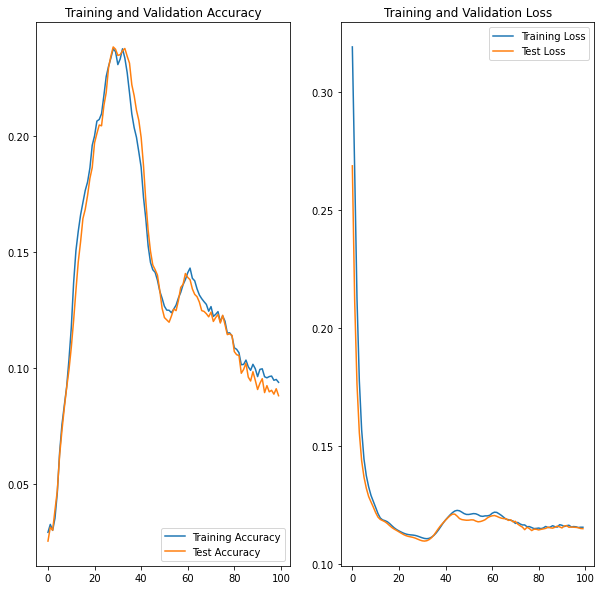

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), train_acc, label='Training Accuracy')
plt.plot(range(EPOCHS), test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),train_loss, label='Training Loss')
plt.plot(range(EPOCHS), test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()